In [22]:
import osmnx as ox
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree

place_name = "Kamppi, Helsinki, Finland"
graph = ox.graph_from_place(place_name)

In [23]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

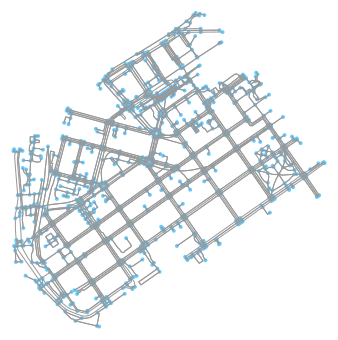

<Figure size 432x288 with 0 Axes>

In [24]:
fig, ax = ox.plot_graph(graph)
plt.tight_layout()

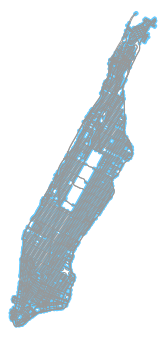

(<Figure size 195.384x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x124008128>)

In [25]:
G = ox.graph_from_place('Manhattan, New York, USA', network_type='drive')
ox.plot_graph(ox.project_graph(G))

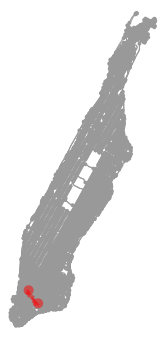

In [26]:
import random
import networkx as nx
nodes = list(G.node())

start = random.choice(nodes)
dest = random.choice(nodes)

start, dest

route = nx.shortest_path(G, start, dest)

fig, ax = ox.plot_graph_route(G, route)

In [36]:
import osmnx as ox 
import networkx as nx
import matplotlib.pyplot as plt

building_coords = {
'EER': (30.288374, -97.735322), 
'BUR': (30.288836, -97.738415), 
'UTC': (30.283224,-97.738817), 
'ECJ': (30.289065,-97.735392), 
'CPE': (30.290272, -97.736160), 
'RLM': (30.288933, -97.736434), 
'MEZ': (30.284443, -97.738986), 
'CBA': (30.284154, -97.737841), 
'GSB': (30.284140, -97.738380), 
'ART': (30.286265, -97.732985), 
'ETC': (30.289938, -97.735431),  
'CMA': (30.289246, -97.740727), 
'RLP': (30.284948, -97.735549), 
'JGB': (30.285900, -97.735731), 
'PHR': (30.288032, -97.738575), 
'SZB': (30.281665, -97.738753), 
'WAG': (30.285059, -97.737567), 
'PAR': (30.284915, -97.740110), 
'PAI': (30.287162, -97.738742), 
'GDC': (30.286233, -97.736536), 
'FNT': (30.287863, -97.737987), 
'WMB': (30.285434, -97.740401), 
'GOL': (30.285324, -97.741174), 
'BTL': (30.285445, -97.740412), 
'SUT': (30.284988, -97.740816), 
'DFA': (30.285950, -97.731741), 
'SEA': (30.290002, -97.737332), 
'GAR': (30.285173, -97.738551), 
'CAL': (30.284514, -97.740121), 
'GEA': (30.287791, -97.739214), 
'BAT': (30.284840, -97.738993), 
'BEN': (30.283986, -97.739040), 
'MRH': (30.287110, -97.730553)}


def update_intersections(G, start_node, end_node):
    """
    Calculates the shortest path length between start and end coordinates and increments an edge count in osmnx's Edge class when encountering intersecting edges between all combinations of 2 lines. 
    Input: list of nodes that represent that start and end destination
    Output: None - edges within the graph are updated to reflect 
    """

    # paths is a list that will contains a list of shortest paths (list of nodes)
    close_start = ox.utils.get_nearest_node(G, start_node)
    close_end = ox.utils.get_nearest_node(G, end_node)
    path = nx.shortest_path(G, close_start, close_end)

    # increment edge count for an edge denoted by path
    for node in range(len(path)-1):
        start = path[node]
        end = path[node+1]
        G.edges[start, end, 0]['count'] += 1

    print( G.edges[start, end, 0])

# given a start and end location, update edge path
# start location: off campus (polygon ID) - need to convert to POLYGON geometry to input into utils.sample_point(polygon, N), then convert using utils.convert_to_lat_long(x, y)
# end location: on campus (building ID) - convert to lat long in dictionary 

def convert_to_graph(G, region_ID, building_ID):
    poly  = df[df['TRACTCE10'] == region_ID].geometry
    rx,ry = utils.sample_point(poly, 1)

    start_pt    = utils.convert_to_lat_long(rx,ry)
    s_latitude  = start_pt.x()
    s_longitude = start_pt.y()
    e_latitude,e_longitude = building_coords[building_ID]

    start_node = ox.utils.get_nearest_nodes(G, (s_latitude, s_longitude))
    end_node   = ox.utils.get_nearest_nodes(G, (e_latitude, e_longitude))

    update_intersection(G, start_node, end_node)


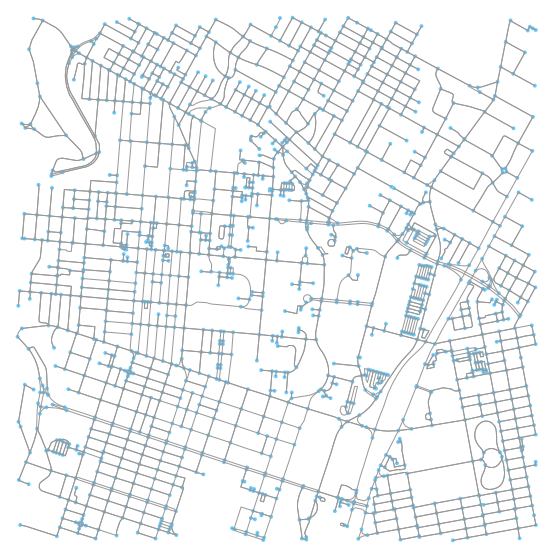

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11db40470>)

In [96]:
location = "2317 Speedway, Austin, TX 78712"
G = ox.graph_from_address(location, distance=3000, network_type='bike')
ox.plot_graph(G, fig_height=10, fig_width=10)

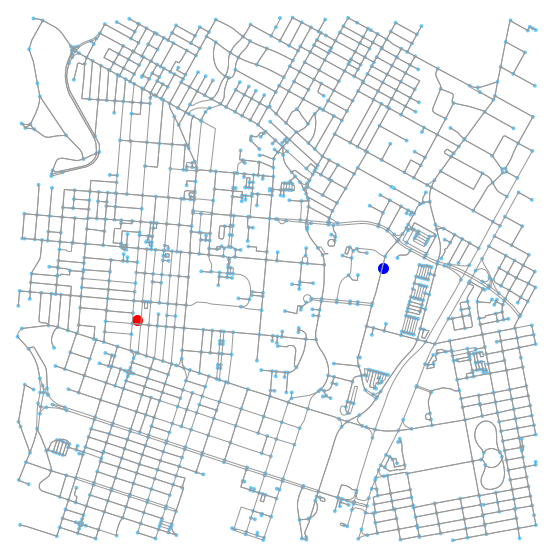

In [97]:
loc_21rio = ox.geocode('2101 Rio Grande St, Austin, TX 78705')
loc_MRH = ox.geocode('2406 Robert Dedman Dr, Austin, TX 78712')

fig, ax = ox.plot_graph(G, fig_height=10, fig_width=10, 
                        show=False, close=False)
ax.scatter(loc_21rio[1], loc_21rio[0], c="red", s=100)
ax.scatter(loc_MRH[1], loc_MRH[0], c="blue", s=100)

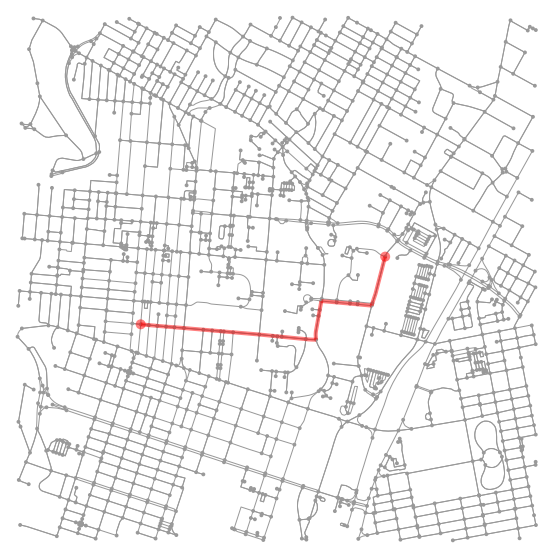

{'osmid': 128248211, 'name': 'West 21st Street', 'highway': 'residential', 'oneway': False, 'length': 47.036, 'count': 1.1601999258388562}
{'osmid': 124953132, 'name': 'West 21st Street', 'highway': 'residential', 'oneway': False, 'length': 48.596, 'count': 1.5798725439497825}
{'osmid': 124953132, 'name': 'West 21st Street', 'highway': 'residential', 'oneway': False, 'length': 50.582, 'count': 1.2872714216602121}
{'osmid': 124953132, 'name': 'West 21st Street', 'highway': 'residential', 'oneway': False, 'length': 48.425, 'count': 1.5749892609089464}
{'osmid': 124953132, 'name': 'West 21st Street', 'highway': 'residential', 'oneway': False, 'length': 55.033, 'count': 1.6004320598572996}
{'osmid': [655501841, 126297977], 'name': 'West 21st Street', 'highway': 'unclassified', 'oneway': False, 'length': 111.57499999999999, 'geometry': <shapely.geometry.linestring.LineString object at 0x102f0d5c0>, 'count': 0.3945102495976789}
{'osmid': 126297977, 'name': 'West 21st Street', 'highway': 'unc

In [151]:
close_start = ox.utils.get_nearest_node(G, loc_21rio)
close_end = ox.utils.get_nearest_node(G, loc_MRH)

path = nx.shortest_path(G, close_start, close_end)
ox.plot_graph_route(G, path, fig_height=10, fig_width=10)


for e in G.edges:
    G.edges[e]['count'] = random.uniform(0, 1)


# increment edge count for an edge denoted by path
for node in range(len(path)-1):
    start = path[node]
    end = path[node+1]
    G.edges[start, end, 0]['count'] += random.uniform(0, 1)

    print( G.edges[start, end, 0])

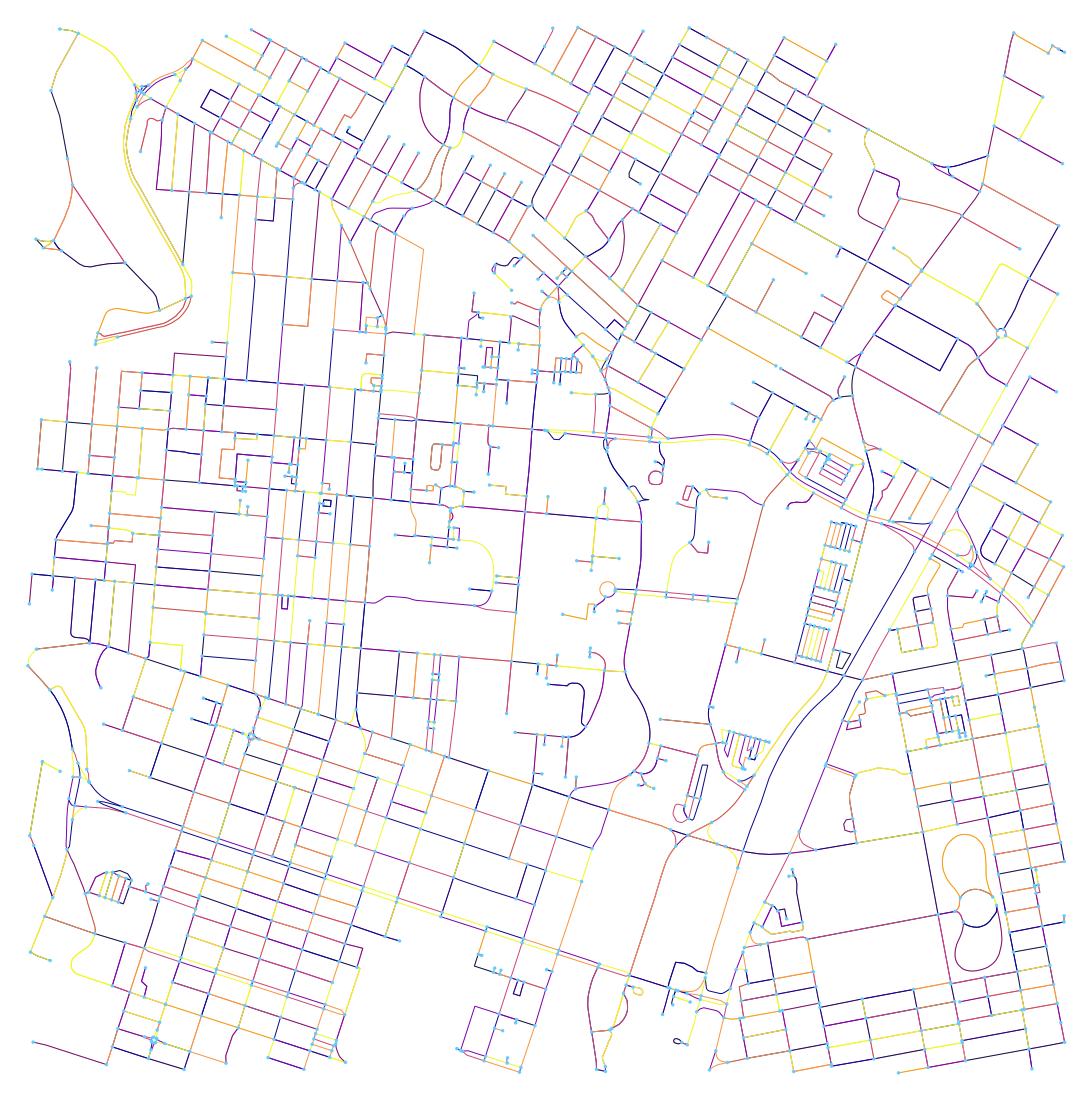

In [153]:
nc = ox.get_edge_colors_by_attr(G, 'count', cmap='plasma')
fig, ax = ox.plot_graph(G, fig_height=20, edge_color=nc, node_size=12, node_zorder=2)
